# Data Science & Machine Learning Project on Supply Chain Management

Supply chain management (SCM) is the centralized management of the flow of goods and services to and from a company and includes all of the processes involved in transforming raw materials and components into final products

## Project Overview

A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two 
years back.
 Their higher management has noticed that there is a mismatch in the demand and 
supply
. Where the demand is high, supply is pretty low and vice-versa which results in a loss inn
inventory cost and ultimately loss to th
e comna
y. Hence, the higher management wants to
optimize the supply quantity in each and every warehouse in the entire cun try.

## Goals

The objective of the project is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.


## Features in the dataset

1) Ware_house_ID                 : Unique Warehouse id where product is prepared for dispatch.
2) WH_Manager_ID                 : Manager Id present in the warehouse
3) zone                          : Zone of the Warehouse
4) WH_regional_zone              : Regional Zone of the warehouse
5) num_refill_req_l3m            : Refilling request received by the warehouse in the last 3 months
6) transport_issue_l1y           : No. of transport issued for warehouse in last 1myear
7) Competitor_in_mkt             : No. of competitors in the market
8) retail_shop_num               : Number of retail shops who sell noodles produced by the warehouse
9) wh_owner_type                 : The warehouse is owned by the company or it is on rent
10) distributor_num              : No. of distributor who works between warehouse and retail shops
11) flood_impacted               : Is the warehouse in a flood impacted area or not
12) flood_proof                  : Warehouse is having flood proof indicator
13) electric_supply              : Does the warehouse have proper electric supply along with some power backup
14) dist_from_hub                : distance from the warehouse to production hub
15) workers_num                  : no. workers in the warehouse
16) wh_est_year                  : warehouse establishment year
17) storage_issue_reported_l3m   : storage issues reported by the warehouse in the last 3months.
18) temp_reg_mach                : warehouse having temperature regulating machine indicator or not
19) approved_wh_govt_certificate : Type of approval warehouse having been issued by government
20) wh_breakdown_l3m             : Number of times the warehouse faces the breakdown in the last 3 months
21) product_wg_ton               : Product weight


Importing the libraries

In [239]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data collection

Loading dataset 

In [240]:
#training dataset 
df_train=pd.read_csv('supply_train.csv')
#testing dataset
df_test=pd.read_csv('supply_test.csv')

## Data exploration

#### Exploratory data analysis

In [241]:
df_train.head(2)

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0           0     WH_100000     EID_50000         Urban            Small   
1           1     WH_100001     EID_50001         Rural            Large   

    zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0   West           Zone 6                   3                    1   
1  North           Zone 5                   0                    0   

   Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                  2  ...                1            91         29.0   
1                  4  ...                1           210         31.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   

   product_wg_ton  
0           17115  
1            5074  

[2 rows x 25 columns]

In [242]:
df_train.shape

(16620, 25)

Training dataset contains 16620 rows and 25 columns

In [243]:
df_train.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [244]:
#Removing the unwanted column 
df_train=df_train.iloc[:,1:]
df_train.head(2)

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   

   product_wg_ton  
0           17115  
1            5074  

[2 rows x 24 columns]

In [245]:
df_test.head(2)

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0       16621     WH_116621     EID_66621         Rural            Large   
1       16622     WH_116622     EID_66622         Rural            Large   

    zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0  North           Zone 5                   5                    0   
1  North           Zone 5                   5                    0   

   Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                  3  ...                0           156         30.0   
1                  2  ...                1            79         31.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0       2006.0                          24              0   
1       2019.0                           5              1   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 2               5   
1                             C                 2              24   

   product_wg_ton  
0           30132  
1            6075  

[2 rows x 25 columns]

In [246]:
df_test.shape

(5529, 25)

Testing data set contains 5529 rows and 25 columns

In [247]:
df_test.columns


Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [248]:
#Removing the unwanted column 
df_test=df_test.iloc[:,1:]
df_test.head(2)

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_116621     EID_66621         Rural            Large  North   
1     WH_116622     EID_66622         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 5                   5                    0   
1           Zone 5                   5                    0   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  3             5590  ...               0            156   
1                  2             5856  ...               1             79   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         30.0       2006.0                          24              0   
1         31.0       2019.0                           5              1   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 2               5   
1                             C                 2              24   

   product_wg_ton  
0           30132  
1            6075  

[2 rows x 24 columns]

In [249]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

In [250]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 5529 non-null   object 
 1   WH_Manager_ID                 5529 non-null   object 
 2   Location_type                 5529 non-null   object 
 3   WH_capacity_size              5529 non-null   object 
 4   zone                          5529 non-null   object 
 5   WH_regional_zone              5529 non-null   object 
 6   num_refill_req_l3m            5529 non-null   int64  
 7   transport_issue_l1y           5529 non-null   int64  
 8   Competitor_in_mkt             5529 non-null   int64  
 9   retail_shop_num               5529 non-null   int64  
 10  wh_owner_type                 5529 non-null   object 
 11  distributor_num               5529 non-null   int64  
 12  flood_impacted                5529 non-null   int64  
 13  flo

In [251]:
df_train.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        16620.000000         16620.000000       16620.000000   
mean             4.126655             0.780927           3.103129   
std              2.606241             1.206351           1.147711   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     16620.000000     16620.000000    16620.000000  16620.000000   
mean       4983.904994        42.473706        0.096871      0.056017   
std        1051.032239        16.090000        0.295791      0.229961   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4309.000000        29.000000        0.000000      0.000000   
50%        4856.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num  wh_est_year  \
count     16620.000000   16620.000000  15953.000000  8760.000000   
mean          0.655716     163.521901     28.911490  2009.345320   
std           0.475149      62.701193      7.842046     7.544672   
min           0.000000      55.000000     10.000000  1996.000000   
25%           0.000000     109.000000     24.000000  2003.000000   
50%           1.000000     164.000000     28.000000  2009.000000   
75%           1.000000     218.000000     33.000000  2016.000000   
max           1.000000     271.000000     98.000000  2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                16620.000000   16620.000000      16620.000000   
mean                    17.127196       0.306137          3.491095   
std                      9.163901       0.460901          1.688614   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    16620.000000    16620.000000  
mean        18.727377    22098.420096  
std          8.619857    11620.337346  
min          1.000000     2093.000000  
25%         11.000000    13057.000000  
50%         19.000000    22099.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

In [252]:
df_test.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count         5529.000000          5529.000000        5529.000000   
mean             4.007235             0.765600           3.106167   
std              2.604325             1.187567           1.128396   
min              0.000000             0.000000           1.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000           9.000000   

       retail_shop_num  distributor_num  flood_impacted  flood_proof  \
count      5529.000000      5529.000000     5529.000000  5529.000000   
mean       4980.695424        42.128052        0.104178     0.049919   
std        1049.617325        15.959934        0.305519     0.217797   
min        1953.000000        15.000000        0.000000     0.000000   
25%        4310.000000        28.000000        0.000000     0.000000   
50%        4863.000000        42.000000        0.000000     0.000000   
75%        5492.000000        56.000000        0.000000     0.000000   
max       10846.000000        70.000000        1.000000     1.000000   

       electric_supply  dist_from_hub  workers_num  wh_est_year  \
count      5529.000000    5529.000000  5319.000000  2844.000000   
mean          0.657262     163.899982    29.010528  2009.572785   
std           0.474668      62.544704     7.848478     7.473201   
min           0.000000      55.000000    10.000000  1996.000000   
25%           0.000000     110.000000    24.000000  2003.000000   
50%           1.000000     165.000000    28.000000  2010.000000   
75%           1.000000     218.000000    33.000000  2016.000000   
max           1.000000     271.000000    98.000000  2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                 5529.000000    5529.000000       5529.000000   
mean                    17.085549       0.298426          3.477302   
std                      9.206551       0.457609          1.700717   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     17.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count     5529.000000     5529.000000  
mean        18.892205    22052.334599  
std          8.716737    11645.738485  
min          1.000000     2065.000000  
25%         11.000000    12143.000000  
50%         21.000000    22099.000000  
75%         26.000000    30099.000000  
max         32.000000    55144.000000

In [253]:
df_train.dtypes.value_counts()

int64      14
object      8
float64     2
Name: count, dtype: int64

In [254]:
df_test.dtypes.value_counts()

int64      14
object      8
float64     2
Name: count, dtype: int64

Both Dataset contains 24 columns with 16620 rows in training dataset and 5529 rows in testing dataset .
Out of 24 features 16 are numerical and 8 are categorical datatypes.

## Data preprocessing

In [255]:
df_train.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [256]:
#managing rows with null values
df_train['workers_num'].fillna(df_train['workers_num'].median(),inplace=True)
df_train['wh_est_year'].fillna(df_train['wh_est_year'].median(),inplace=True)
df_train['approved_wh_govt_certificate'].fillna('NIL',inplace=True)

In [257]:
df_train.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [258]:
df_test.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [259]:
#managing rows with null values
df_test['workers_num'].fillna(df_test['workers_num'].median(),inplace=True)
df_test['wh_est_year'].fillna(df_test['wh_est_year'].median(),inplace=True)
df_test['approved_wh_govt_certificate'].fillna('NIL',inplace=True)

In [260]:
df_test.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [261]:
df_train.duplicated().sum()

0

In [262]:
df_test.duplicated().sum()

0

In [263]:
#seperating numerical and categorical columns
num_cols=df_train.select_dtypes(include='number')
cat_cols=df_train.select_dtypes(exclude='number')

In [264]:
num_cols.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [265]:
cat_cols.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [266]:
# counting the number of occurrences of each unique value for all numerical columns
for i in num_cols:
    a=df_train[i].value_counts()
    print(i,a)

num_refill_req_l3m num_refill_req_l3m
8    2032
3    1984
5    1967
7    1941
0    1900
4    1885
6    1857
1    1835
2    1219
Name: count, dtype: int64
transport_issue_l1y transport_issue_l1y
0    10094
1     3072
2     1437
3     1272
4      508
5      237
Name: count, dtype: int64
Competitor_in_mkt Competitor_in_mkt
2     5790
3     4702
4     4438
5      825
6      375
1      291
7      136
8       49
10       6
9        6
12       1
0        1
Name: count, dtype: int64
retail_shop_num retail_shop_num
4808    18
5022    17
4367    17
4611    16
4439    16
        ..
7176     1
3483     1
8522     1
7570     1
7347     1
Name: count, Length: 4356, dtype: int64
distributor_num distributor_num
21    328
69    323
49    322
35    321
59    319
63    319
47    318
36    317
37    315
41    314
40    314
28    313
44    311
31    311
24    309
42    307
38    307
57    305
30    304
54    303
50    303
65    302
29    302
48    301
23    300
64    299
56    299
22    298
20    297
15   

In [267]:
# counting the number of occurrences of each unique value for all categorical columns
for i in cat_cols:
    b=df_train[i].value_counts()
    print(i,b)

Ware_house_ID Ware_house_ID
WH_100000    1
WH_111101    1
WH_111071    1
WH_111072    1
WH_111073    1
            ..
WH_105545    1
WH_105546    1
WH_105547    1
WH_105548    1
WH_116619    1
Name: count, Length: 16620, dtype: int64
WH_Manager_ID WH_Manager_ID
EID_50000    1
EID_61101    1
EID_61071    1
EID_61072    1
EID_61073    1
            ..
EID_55545    1
EID_55546    1
EID_55547    1
EID_55548    1
EID_66619    1
Name: count, Length: 16620, dtype: int64
Location_type Location_type
Rural    15272
Urban     1348
Name: count, dtype: int64
WH_capacity_size WH_capacity_size
Large    6743
Mid      6691
Small    3186
Name: count, dtype: int64
zone zone
North    6800
West     5320
South    4223
East      277
Name: count, dtype: int64
WH_regional_zone WH_regional_zone
Zone 6    5568
Zone 5    3027
Zone 4    2756
Zone 2    1998
Zone 3    1937
Zone 1    1334
Name: count, dtype: int64
wh_owner_type wh_owner_type
Company Owned    8975
Rented           7645
Name: count, dtype: int64
approv

In [268]:
# counting the number of  unique values in all numerical columns
for i in num_cols:
    c=df_train[i].unique()
    print(i ,':',c)

num_refill_req_l3m : [3 0 1 7 8 4 6 5 2]
transport_issue_l1y : [1 0 4 3 2 5]
Competitor_in_mkt : [ 2  4  3  5  1  8  7  6 10  9 12  0]
retail_shop_num : [4651 6217 4306 ... 2716 8344 7347]
distributor_num : [24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20]
flood_impacted : [0 1]
flood_proof : [1 0]
electric_supply : [1 0]
dist_from_hub : [ 91 210 161 103 112 152  77 241 124  78 150 225  95 242 129 190 231 261
 159 189  65 156 199  80 140  67 229  98 154 230 164 197 262 125  94 153
 216 247 123 167 220 134  64 196 240  85 253  66 168 219 110  69 239 237
 113 181 255  90 151  58 256  84  83 173 212 158  55 257  70 160  96 108
 271 263 234 109 198 182 114 166 141 165 204  60 130 254 227 248 252 177
 105  79 232 171  92 223 144  86 128 145  99 115 187 200 260 215  97 106
 133 218 119 206 233 235  81 264 142 101 186 246 176 267 211 221 175 195
 170 149 214 157 146 194 27

In [269]:
# counting the number of  unique values in all categorical columns
for i in cat_cols:
    d=df_train[i].unique()
    print(i ,':',d)

Ware_house_ID : ['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_116617' 'WH_116618'
 'WH_116619']
WH_Manager_ID : ['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_66617' 'EID_66618'
 'EID_66619']
Location_type : ['Urban' 'Rural']
WH_capacity_size : ['Small' 'Large' 'Mid']
zone : ['West' 'North' 'South' 'East']
WH_regional_zone : ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
wh_owner_type : ['Rented' 'Company Owned']
approved_wh_govt_certificate : ['A' 'A+' 'C' 'B' 'B+' 'NIL']


## Data visualization

#### Visualizing Numerical features 

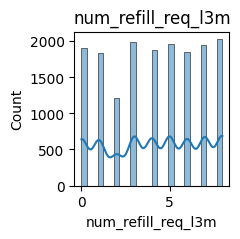

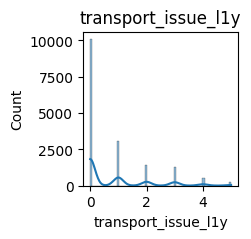

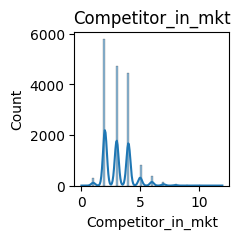

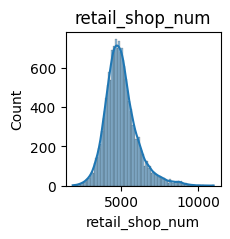

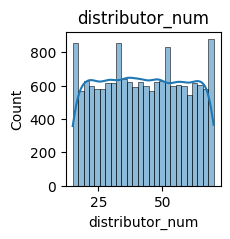

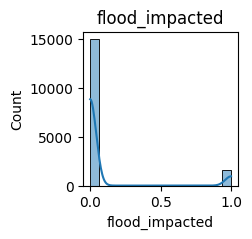

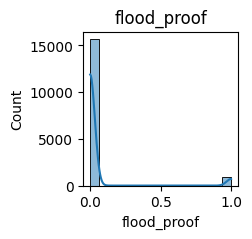

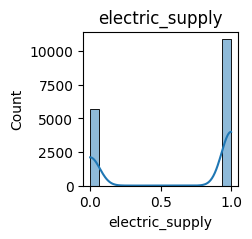

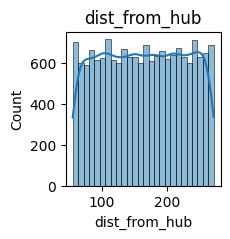

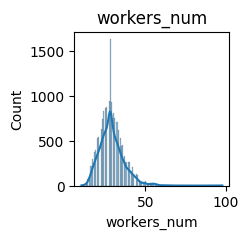

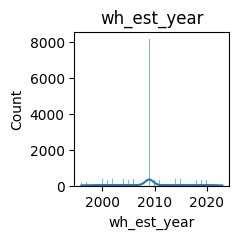

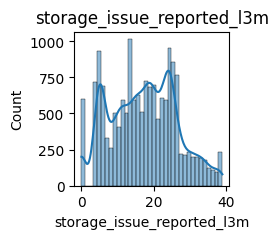

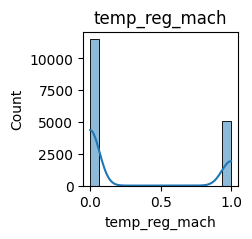

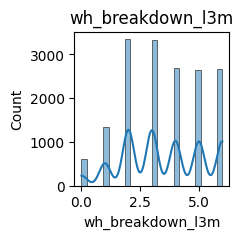

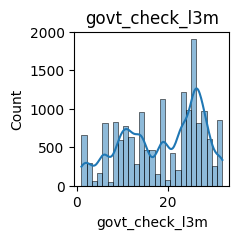

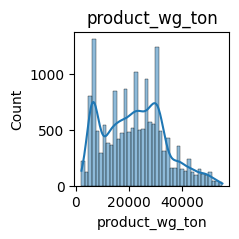

In [270]:
#Plotting histograms for numerical columns
for cols in num_cols:   
    plt.figure(figsize=(2,2))
    sns.histplot(data=df_train,x=df_train[cols],kde=True)
    plt.xlabel(cols)
    plt.title(cols)
    plt.show()

#### Visualizing Categorical features 

In [271]:
cat_cols.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

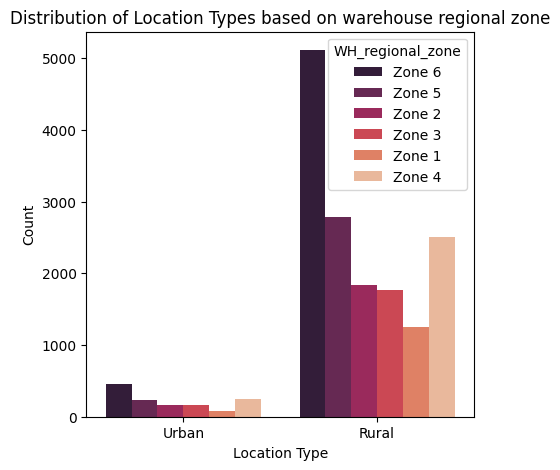

In [272]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_train, x='Location_type',hue='WH_regional_zone',palette='rocket')
plt.title('Distribution of Location Types based on warehouse regional zone')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

Rural area has more number of warehouses than urban.
Zone 6 majority warehouses and zone 1 has the least.
Zone 6 in rural area has the highest number of warehouses and the least is in Zone 1 urban area 


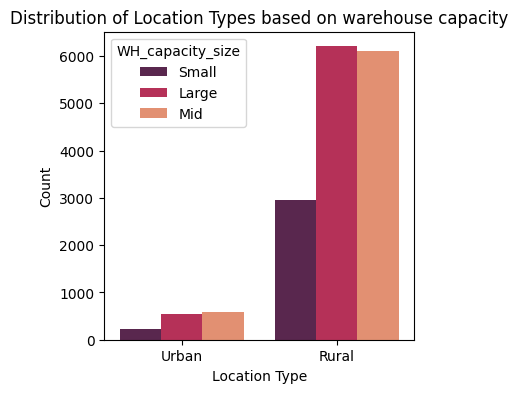

In [273]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_train, x='Location_type',hue='WH_capacity_size',palette='rocket')
plt.title('Distribution of Location Types based on warehouse capacity')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

Rural area has warehouses with large and mid capacity size than urban
Urban area has more number of mid sized warehouses .

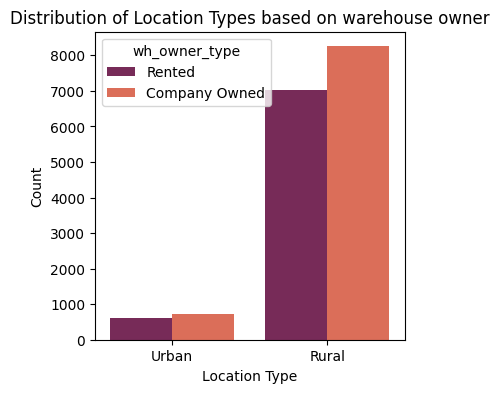

In [274]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_train, x='Location_type',hue='wh_owner_type',palette='rocket')
plt.title('Distribution of Location Types based on warehouse owner')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

In rural and urban area most of the warehouses are owned by company itself.

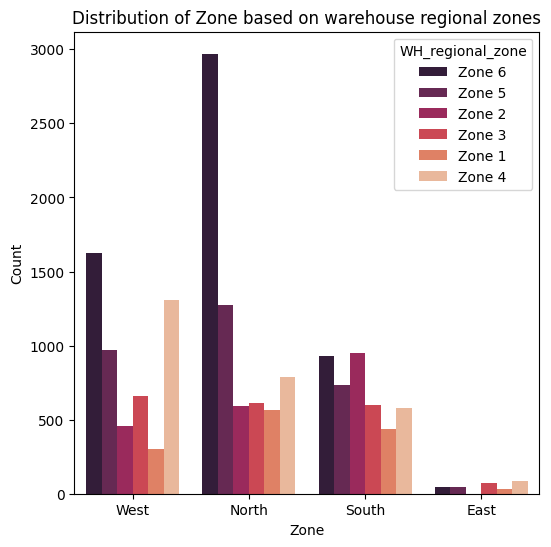

In [275]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_train, x='zone',hue='WH_regional_zone',palette='rocket')
plt.title('Distribution of Zone based on warehouse regional zones')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.show()

Zone 6 in north has the largest number of warehouses and the least number of warehouses are in  Zone 1 in East .
Zone 2 in East doesnot have any warehouses.

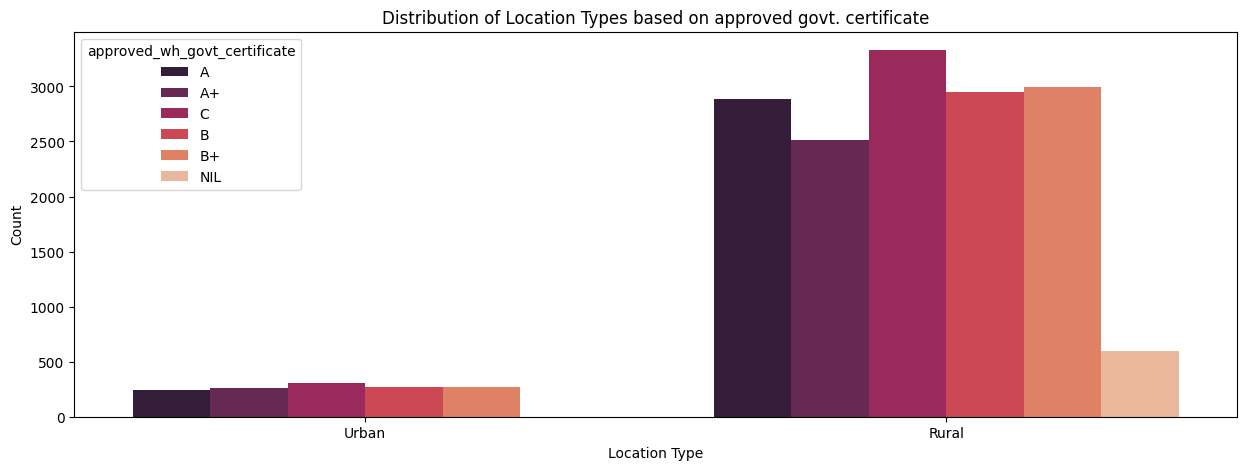

In [276]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_train, hue='approved_wh_govt_certificate',x='Location_type',palette='rocket')
plt.title('Distribution of Location Types based on approved govt. certificate')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

Most warehouses in rural  area are 'C' grade certified,followed by B+ and B.
In Urban areas most of them are 'C' certified, and almost equal number of warehouses with A+, B and B+ grades.

## Observation from numerical and categorical features 

    1. Most of the warehouses are present in the rural area.This may be due to easier availability of raw materials , more land for building warehouses     and other geographical features.
    2. Also the warehouses in rural areas have much larger capacity than compared to urban areas. This may be due to the unavailabilty of large area in     urban places.
    3. Majority of the warehouses are owned by the company itself .
    4. Most warehouses are C grade certified  .

## Feature Selection

In [277]:
num_cols.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

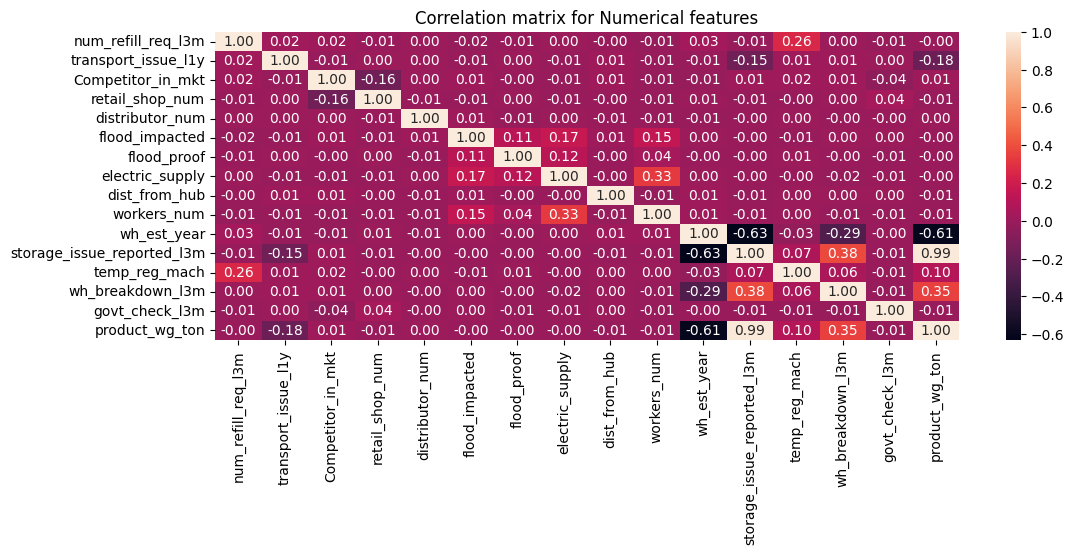

In [278]:
#correlation matrix
correlation_matrix=num_cols.corr()
#plotting heatmap
plt.figure(figsize=(12,4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='rocket')
plt.title('Correlation matrix for Numerical features')
plt.show()


### OBSERVATIONS
##### Numerical Features that are highly correlated with product _wg_ton:

##### (1) storage_issue_reported_13m : positive correlation coefficient = 0.99
     This indicates a strong relation between storage issue reported in last 3 months  and weight of product shipped from the warehouse.
     As storage issue increase ,weight of product shipped from that warehouse also increases.

##### (2) wh_breakdown_13m : positive correlation coefficient = 0.35
     Even though this indicates only a moderate correlation , it can be helpful in making the model.
    
##### (3) wh_est_year : negative correlation coefficient = -0.61
     Warehouse establishment year shows a relatively strong negative correlation with product weight .
     Newly established warehouses tend to ship more product than old warehouses.
     

##### When we check for multicollinearity we can see that :
##### (1)'storage_issue_reported_13m' & 'wh_breakdown_13m' :positive correlation coefficient = 0.38
    Both are correlated with a correlation coefficient of 0.38.Thus we choose the best numerical feature among them that is highly correlated with 
    'product _wg_ton'.So 'storage_issue_reported_13m' is taken .
##### (2)'storage_issue_reported_13m' & ' wh_est_year ' :negative correlation coefficient = -0.63
    Both are correlated with a correlation coefficient of -0.63.Thus we choose the best numerical feature among them that is highly correlated with 
    'product _wg_ton'.So 'storage_issue_reported_13m' is taken in this case also.

##### So,among the Numerical Features only 'storage_issue_reported_13m'  is selected that has a high correlation  with 'product _wg_ton'.

    



In [279]:
cat_cols.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

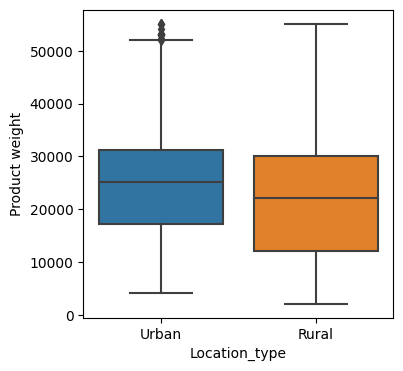

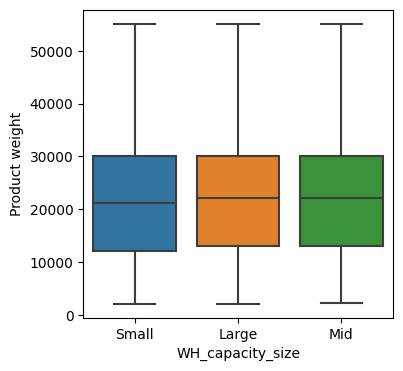

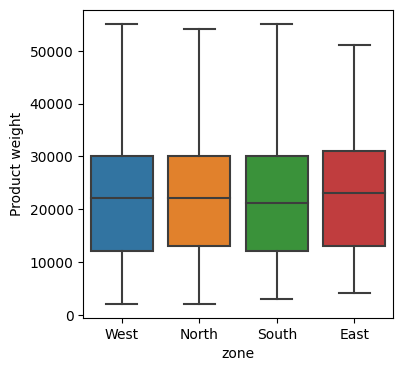

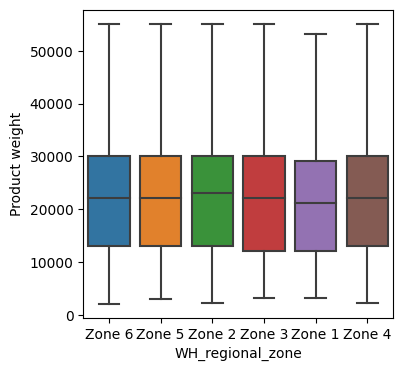

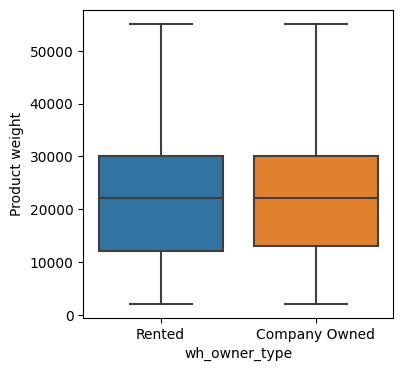

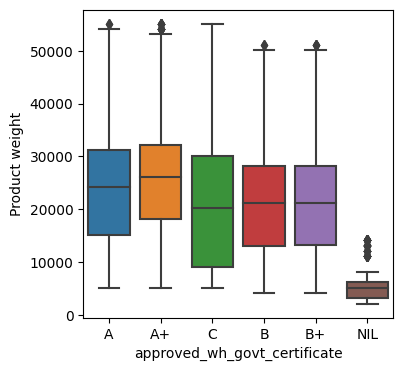

In [280]:
k=['Location_type', 'WH_capacity_size','zone', 'WH_regional_zone', 'wh_owner_type','approved_wh_govt_certificate']
for i in k:
    plt.figure(figsize=(4,4))
    sns.boxplot(data = df_train, x=i, y ='product_wg_ton')
    plt.xlabel(i)
    plt.ylabel('Product weight')
    plt.show()
    

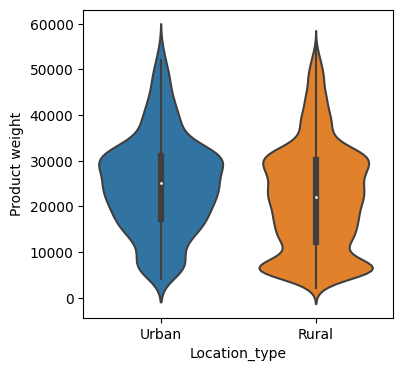

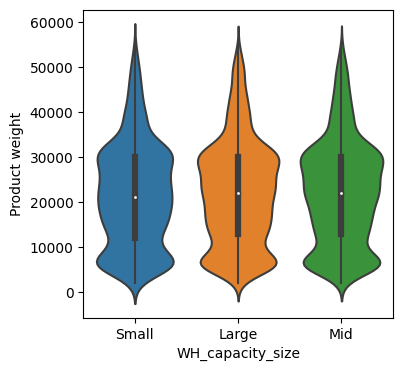

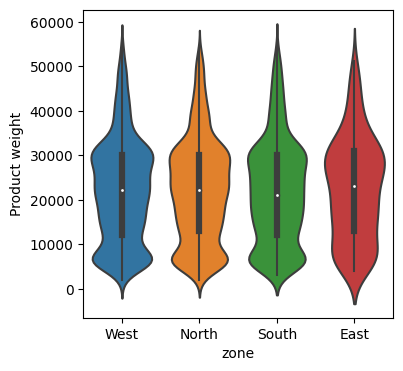

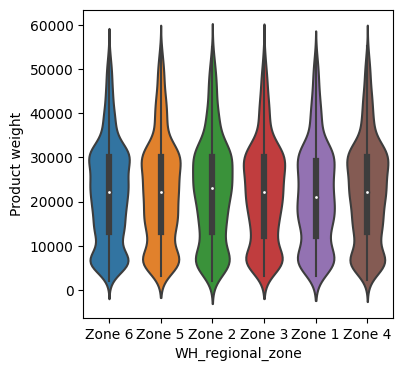

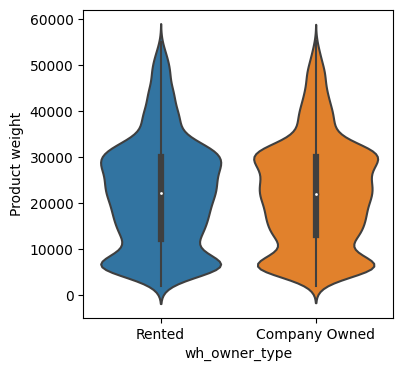

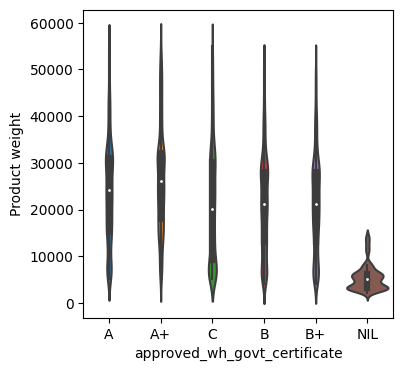

In [281]:
k=['Location_type', 'WH_capacity_size','zone', 'WH_regional_zone', 'wh_owner_type','approved_wh_govt_certificate']
for i in k:
    plt.figure(figsize=(4,4))
    sns.violinplot(data = df_train, x=i, y ='product_wg_ton')
    plt.xlabel(i)
    plt.ylabel('Product weight')
    plt.show()

### OBSERVATIONS
    Categorical Features that are highly correlated with product _wg_ton:
#### (1) Location_type : 
    Whether the warehouse is in Urban or Rural area influences the product weight shipped
#### (2) WH_capacity_size :
    Small ,Mid or Large the warhouse influence the product weight
#### (3) zone :
    Zone of the warehouse whether it is from North,South,East or west can impact the product weight
#### (4) WH_regional_zone :
    Regional zones can also affect the weight of product
#### (5) approved_wh_govt_certificate :
    Government certification grades also influences the weight of product shipped from each warehouse.
    
    

## Feature that affect the target variable
1) storage_issue_reported_13m 
2) Location_type
3) WH_capacity_size
4) zone
5) WH_regional_zone
6) approved_wh_govt_certificate

#### Removing unimportant features from training and testing dataset

In [282]:
#training dataset with necessary features
df_training=df_train[['storage_issue_reported_l3m',
'Location_type','WH_capacity_size','zone','WH_regional_zone','approved_wh_govt_certificate','product_wg_ton']]
df_training

storage_issue_reported_l3m Location_type WH_capacity_size   zone  \
0                              13         Urban            Small   West   
1                               4         Rural            Large  North   
2                              17         Rural              Mid  South   
3                              17         Rural              Mid  North   
4                              18         Rural            Large  North   
...                           ...           ...              ...    ...   
16615                          14         Urban            Large   West   
16616                          17         Urban            Large  North   
16617                          24         Rural            Large  North   
16618                          16         Rural            Small   West   
16619                          32         Rural            Large   West   

      WH_regional_zone approved_wh_govt_certificate  product_wg_ton  
0               Zone 6                            A           17115  
1               Zone 5                            A            5074  
2               Zone 2                            A           23137  
3               Zone 3                           A+           22115  
4               Zone 5                            C           24071  
...                ...                          ...             ...  
16615           Zone 6                           B+           16094  
16616           Zone 5                           B+           21113  
16617           Zone 6                            B           28117  
16618           Zone 6                            A           21103  
16619           Zone 5                           B+           38097  

[16620 rows x 7 columns]

In [283]:
#testing dataset with necessary features
df_testing=df_test[['storage_issue_reported_l3m',
'Location_type','WH_capacity_size','zone','WH_regional_zone','approved_wh_govt_certificate','product_wg_ton']]
df_testing

storage_issue_reported_l3m Location_type WH_capacity_size   zone  \
0                             24         Rural            Large  North   
1                              5         Rural            Large  North   
2                             19         Rural            Small  North   
3                              9         Rural              Mid   West   
4                             25         Urban              Mid  North   
...                          ...           ...              ...    ...   
5524                          22         Rural            Large  North   
5525                          26         Rural            Small  South   
5526                          20         Rural            Large  North   
5527                          13         Rural            Large  North   
5528                          11         Rural              Mid   East   

     WH_regional_zone approved_wh_govt_certificate  product_wg_ton  
0              Zone 5                            A           30132  
1              Zone 5                            C            6075  
2              Zone 6                           A+           24076  
3              Zone 4                           A+           13092  
4              Zone 4                            B           29071  
...               ...                          ...             ...  
5524           Zone 6                           A+           29138  
5525           Zone 6                            C           33108  
5526           Zone 6                           B+           24072  
5527           Zone 6                            B           15055  
5528           Zone 4                            C           14103  

[5529 rows x 7 columns]

## Encoding categorical variables with One Hot encoder

In [284]:
#training dataset
from sklearn.preprocessing import OneHotEncoder
df_training_one_hot_encoded = pd.get_dummies(data = df_training, columns = ['Location_type','WH_capacity_size','zone','WH_regional_zone','approved_wh_govt_certificate'])
df_training_one_hot_encoded.head(2)

storage_issue_reported_l3m  product_wg_ton  Location_type_Rural  \
0                          13           17115                False   
1                           4            5074                 True   

   Location_type_Urban  WH_capacity_size_Large  WH_capacity_size_Mid  \
0                 True                   False                 False   
1                False                    True                 False   

   WH_capacity_size_Small  zone_East  zone_North  zone_South  ...  \
0                    True      False       False       False  ...   
1                   False      False        True       False  ...   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                    False                    False                    False   
1                    False                    False                     True   

   WH_regional_zone_Zone 6  approved_wh_govt_certificate_A  \
0                     True                            True   
1                    False                            True   

   approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
0                            False                           False   
1                            False                           False   

   approved_wh_govt_certificate_B+  approved_wh_govt_certificate_C  \
0                            False                           False   
1                            False                           False   

   approved_wh_govt_certificate_NIL  
0                             False  
1                             False  

[2 rows x 23 columns]

In [285]:
#testing dataset
from sklearn.preprocessing import OneHotEncoder
df_testing_one_hot_encoded = pd.get_dummies(data = df_testing, columns = ['Location_type','WH_capacity_size','zone','WH_regional_zone','approved_wh_govt_certificate'])
df_testing_one_hot_encoded.head(2)

storage_issue_reported_l3m  product_wg_ton  Location_type_Rural  \
0                          24           30132                 True   
1                           5            6075                 True   

   Location_type_Urban  WH_capacity_size_Large  WH_capacity_size_Mid  \
0                False                    True                 False   
1                False                    True                 False   

   WH_capacity_size_Small  zone_East  zone_North  zone_South  ...  \
0                   False      False        True       False  ...   
1                   False      False        True       False  ...   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                    False                    False                     True   
1                    False                    False                     True   

   WH_regional_zone_Zone 6  approved_wh_govt_certificate_A  \
0                    False                            True   
1                    False                           False   

   approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
0                            False                           False   
1                            False                           False   

   approved_wh_govt_certificate_B+  approved_wh_govt_certificate_C  \
0                            False                           False   
1                            False                            True   

   approved_wh_govt_certificate_NIL  
0                             False  
1                             False  

[2 rows x 23 columns]

## Splitting dataset

In [286]:
x_train=df_training_one_hot_encoded.drop(['product_wg_ton'],axis=1)
x_train.head(2)

storage_issue_reported_l3m  Location_type_Rural  Location_type_Urban  \
0                          13                False                 True   
1                           4                 True                False   

   WH_capacity_size_Large  WH_capacity_size_Mid  WH_capacity_size_Small  \
0                   False                 False                    True   
1                    True                 False                   False   

   zone_East  zone_North  zone_South  zone_West  ...  WH_regional_zone_Zone 3  \
0      False       False       False       True  ...                    False   
1      False        True       False      False  ...                    False   

   WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  \
0                    False                    False                     True   
1                    False                     True                    False   

   approved_wh_govt_certificate_A  approved_wh_govt_certificate_A+  \
0                            True                            False   
1                            True                            False   

   approved_wh_govt_certificate_B  approved_wh_govt_certificate_B+  \
0                           False                            False   
1                           False                            False   

   approved_wh_govt_certificate_C  approved_wh_govt_certificate_NIL  
0                           False                             False  
1                           False                             False  

[2 rows x 22 columns]

In [287]:
y_train=df_training_one_hot_encoded.product_wg_ton
y_train.head(2)

0    17115
1     5074
Name: product_wg_ton, dtype: int64

In [288]:
x_test=df_testing_one_hot_encoded.drop(['product_wg_ton'],axis=1)
x_test.head(2)

storage_issue_reported_l3m  Location_type_Rural  Location_type_Urban  \
0                          24                 True                False   
1                           5                 True                False   

   WH_capacity_size_Large  WH_capacity_size_Mid  WH_capacity_size_Small  \
0                    True                 False                   False   
1                    True                 False                   False   

   zone_East  zone_North  zone_South  zone_West  ...  WH_regional_zone_Zone 3  \
0      False        True       False      False  ...                    False   
1      False        True       False      False  ...                    False   

   WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  \
0                    False                     True                    False   
1                    False                     True                    False   

   approved_wh_govt_certificate_A  approved_wh_govt_certificate_A+  \
0                            True                            False   
1                           False                            False   

   approved_wh_govt_certificate_B  approved_wh_govt_certificate_B+  \
0                           False                            False   
1                           False                            False   

   approved_wh_govt_certificate_C  approved_wh_govt_certificate_NIL  
0                           False                             False  
1                            True                             False  

[2 rows x 22 columns]

In [289]:
y_test=df_testing_one_hot_encoded.product_wg_ton
y_test.head(2)

0    30132
1     6075
Name: product_wg_ton, dtype: int64

## Model Selection

    1)Linear Regression
    2)Decision Tree
    3)Random Forest
    4)Support Vector Regression
    5)Gradient Boosting Regression
    6)AdaBoost Regression
    7)XGB Regressor

## Model Training and Evaluation

In [290]:
#importing all the libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### 1) Linear regression

In [291]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)

In [292]:
#mean squared error
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean squared error :", mse_lr)

Mean squared error : 1443177.035658573


In [293]:
#Root mean squared error
rmse_lr = np.sqrt(mse_lr)
print("Root Mean Squared Error :", rmse_lr)

Root Mean Squared Error : 1201.3230355148332


In [294]:
#r2 score
r2_lr = r2_score(y_test, y_pred_lr)
print("R-squared :", r2_lr)

R-squared : 0.9893569991141291


In [295]:
#mean absolute error
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error :", mae_lr)

Mean Absolute Error : 930.2400524507144


#### 2) Decision Tree

In [296]:
parameter = {   
    'max_depth': [1,2,3,4],    
    'max_features': ['auto', 'sqrt', 'log2']
}

In [297]:
model_dt_gscv = DecisionTreeRegressor()

In [298]:
grid_dt=GridSearchCV(model_dt_gscv,parameter)

In [299]:
grid_dt.fit(x_train,y_train)

C:\Users\bsind\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bsind\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bsind\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\bsind\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [300]:
best_pa=grid_dt.best_params_
best_pa

{'max_depth': 4, 'max_features': 'sqrt'}

In [301]:
model_dt = DecisionTreeRegressor(max_depth= 4, max_features='log2') 

In [302]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features='log2')

In [303]:
y_pred_dt=model_dt.predict(x_test)

In [304]:
#mean squared error
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean squared error :", mse_dt)

Mean squared error : 26214370.32974153


In [305]:
#Root mean squared error
rmse_dt = np.sqrt(mse_dt)
print("Root Mean Squared Error :", rmse_dt)

Root Mean Squared Error : 5119.997102513002


In [306]:
#r2 score
r2_dt = r2_score(y_test, y_pred_dt)
print("R-squared :", r2_dt)

R-squared : 0.8066768249851839


In [307]:
#mean absolute error
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error :", mae_dt)

Mean Absolute Error : 4239.852774419544


#### 3) Random Forest

In [308]:
parameter={
    'n_estimators': [10, 20, 50, 100],
    'max_depth':[1,2,3,4,5]
}

In [309]:
model_rf_gscv = RandomForestRegressor()

In [310]:
grid_rf=GridSearchCV(model_rf_gscv,parameter)

In [311]:
grid_rf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 50, 100]})

In [312]:
best_pa=grid_rf.best_params_
best_pa

{'max_depth': 5, 'n_estimators': 100}

In [313]:
model_rf=RandomForestRegressor(max_depth= 5, n_estimators= 100)

In [314]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [315]:
y_pred_rf=model_rf.predict(x_test)

In [316]:
#mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean squared error :", mse_rf)

Mean squared error : 2089839.2239976174


In [317]:
#Root mean squared error
rmse_rf = np.sqrt(mse_rf)
print("Root Mean Squared Error :", rmse_rf)

Root Mean Squared Error : 1445.6276228675272


In [318]:
#r2 score
r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared :", r2_rf)

R-squared : 0.9845880580394737


In [319]:
#mean absolute error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error :", mae_rf)

Mean Absolute Error : 1078.2377105921848


#### 4) Support vector regression (SVR)

In [320]:
parameter = {
    'kernel': ['linear', 'rbf']
}

In [321]:
model_svr_gscv=SVR()

In [322]:
grid_svr = GridSearchCV(model_svr_gscv, parameter)

In [323]:
grid_svr.fit(x_train,y_train)

GridSearchCV(estimator=SVR(), param_grid={'kernel': ['linear', 'rbf']})

In [324]:
best_pa=grid_svr.best_params_
best_pa

{'kernel': 'linear'}

In [325]:
model_svr=SVR(kernel='linear')

In [326]:
model_svr.fit(x_train,y_train)

SVR(kernel='linear')

In [327]:
y_pred_svr=model_svr.predict(x_test)

In [328]:
#mean squared error
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean squared error :", mse_svr)

Mean squared error : 2420423.231676581


In [329]:
#Root mean squared error
rmse_svr = np.sqrt(mse_svr)
print("Root Mean Squared Error :", rmse_svr)

Root Mean Squared Error : 1555.7709444762686


In [330]:
#r2 score
r2_svr = r2_score(y_test, y_pred_svr)
print("R-squared :", r2_svr)

R-squared : 0.9821500994248008


In [331]:
#mean absolute error
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error :", mae_svr)

Mean Absolute Error : 1033.6504647892527


#### 5) Gradient Boosting Regression

In [332]:
parameter = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50,100,150],
    'max_depth': [1,2,3,4]
}

In [333]:
model_gbr_gscv=GradientBoostingRegressor()

In [334]:
grid_gbr = GridSearchCV(model_gbr_gscv, parameter)

In [335]:
grid_gbr.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [336]:
best_pa=grid_gbr.best_params_
best_pa

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

In [337]:
model_gbr=GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 150 )

In [338]:
model_gbr.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=150)

In [339]:
y_pred_gbr=model_gbr.predict(x_test)

In [340]:
#mean squared error
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print("Mean squared error :", mse_gbr)

Mean squared error : 1102534.8458942275


In [341]:
#Root mean squared error
rmse_gbr = np.sqrt(mse_gbr)
print("Root Mean Squared Error :", rmse_gbr)

Root Mean Squared Error : 1050.0165931518547


In [342]:
#r2 score
r2_gbr = r2_score(y_test, y_pred_gbr)
print("R-squared :", r2_gbr)

R-squared : 0.9918691338265364


In [343]:
#mean absolute error
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print("Mean Absolute Error :", mae_gbr)

Mean Absolute Error : 779.3384820431273


#### 6) AdaBoost Regressor

In [344]:
parameter = {
    'learning_rate': [0.1,0.01 ],
    'n_estimators': [100,150,200]
}

In [345]:
model_abr_gscv=AdaBoostRegressor( )

In [346]:
grid_abr = GridSearchCV(model_abr_gscv, parameter)

In [347]:
grid_abr.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.01],
                         'n_estimators': [100, 150, 200]})

In [348]:
best_pa=grid_abr.best_params_
best_pa

{'learning_rate': 0.1, 'n_estimators': 100}

In [349]:
model_abr=AdaBoostRegressor(learning_rate= 0.1, n_estimators= 100)

In [350]:
model_abr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100)

In [351]:
y_pred_abr=model_abr.predict(x_test)

In [352]:
#mean squared error
mse_abr = mean_squared_error(y_test, y_pred_abr)
print("Mean squared error :", mse_abr)

Mean squared error : 2865278.694897074


In [353]:
#Root mean squared error
rmse_abr = np.sqrt(mse_abr)
print("Root Mean Squared Error :", rmse_abr)

Root Mean Squared Error : 1692.713411920953


In [354]:
#r2 score
r2_abr = r2_score(y_test, y_pred_abr)
print("R-squared :", r2_abr)

R-squared : 0.9788694228534891


In [355]:
#mean absolute error
mae_abr = mean_absolute_error(y_test, y_pred_abr)
print("Mean Absolute Error :", mae_abr)

Mean Absolute Error : 1332.1284934396688


#### 7) XGB Regressor

In [356]:
parameter = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100,150,200],
    'max_depth': [1,2,3,4,5]
}

In [357]:
model_xgb_gscv = XGBRegressor()

In [358]:
grid_xgb = GridSearchCV(model_xgb_gscv, parameter)

In [359]:
grid_xgb.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]})

In [360]:
best_pa=grid_xgb.best_params_
best_pa

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

In [361]:
model_xgb=XGBRegressor(learning_rate= 0.1,max_depth= 3, n_estimators= 150)

In [362]:
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [363]:
y_pred_xgb=model_xgb.predict(x_test)

In [364]:
#mean squared error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean squared error :", mse_xgb)

Mean squared error : 1099816.7592849724


In [365]:
#Root mean squared error
rmse_xgb = np.sqrt(mse_xgb)
print("Root Mean Squared Error :", rmse_xgb)

Root Mean Squared Error : 1048.721487948527


In [366]:
#r2 score
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R-squared :", r2_xgb)

R-squared : 0.9918891789058825


In [367]:
#mean absolute error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("Mean Absolute Error :", mae_xgb)

Mean Absolute Error : 779.0879838832745


## Model Prediction

In [368]:
accuracy_data = [['Linear Regression',mse_lr, rmse_lr, mae_lr, r2_lr],
        ['Decision Tree',mse_dt, rmse_dt, mae_dt, r2_dt],
        ['Random Forest', mse_rf, rmse_rf, mae_rf, r2_rf],
        ['Support Vector Regression',mse_svr, rmse_svr, mae_svr, r2_svr],
        ['Gradient Boosting Regression',mse_gbr, rmse_gbr, mae_gbr, r2_gbr],
        ['AdaBoost Regression',mse_abr, rmse_abr, mae_abr, r2_abr],
        ['XGBoost Regression',mse_xgb, rmse_xgb, mae_xgb, r2_xgb]]
accuracy_df = pd.DataFrame(accuracy_data, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2 SCORE'])
accuracy_df['MSE'] =accuracy_df['MSE'].apply(np.int64)
accuracy_df

Model       MSE         RMSE          MAE  R2 SCORE
0             Linear Regression   1443177  1201.323036   930.240052  0.989357
1                 Decision Tree  26214370  5119.997103  4239.852774  0.806677
2                 Random Forest   2089839  1445.627623  1078.237711  0.984588
3     Support Vector Regression   2420423  1555.770944  1033.650465  0.982150
4  Gradient Boosting Regression   1102534  1050.016593   779.338482  0.991869
5           AdaBoost Regression   2865278  1692.713412  1332.128493  0.978869
6            XGBoost Regression   1099816  1048.721488   779.087984  0.991889

### From this accuracy scores ,we can conclude that the best fit model is "XGBoost Regression"

#### Plotting Actual and Predicted values

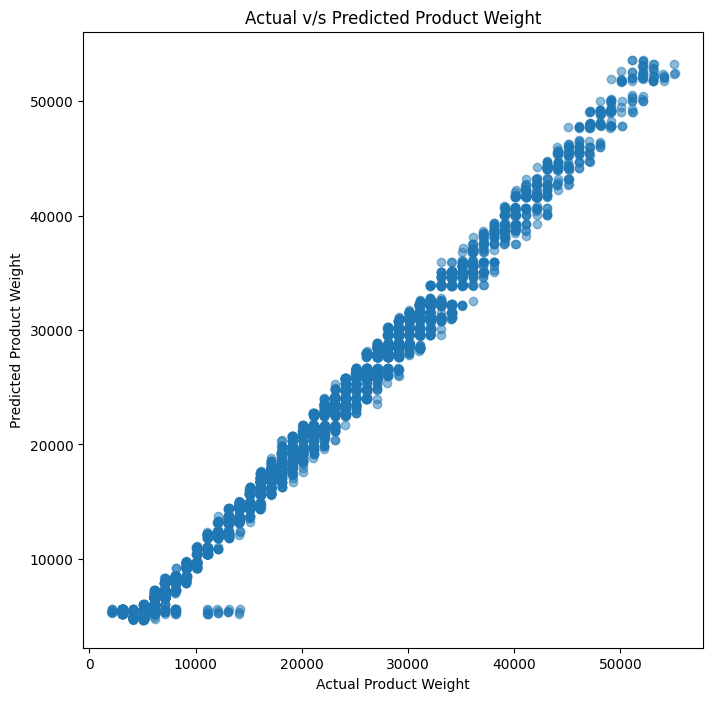

In [369]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Product Weight")
plt.ylabel("Predicted Product Weight")
plt.title("Actual v/s Predicted Product Weight")
plt.show()

All the datapoints are very close to each other which means the value predicted by the model is very similar to actual values in the dataset

## CONCLUSION


    Among the 7 models that were created the XGBoost Regression model performed well with a high R2 score of 99% and least mean squared error, root mean squared error and mean absolute error.
    Implementing the best machine learning algorithm (XGBoost Regression) into supply chain management can help to optimize the quantity 
    shipped there  by making profits.This can help in avoiding the mismatch between demand and supply.